# Describing data
### A structured approach using Python

### Contents:
1. Importing packages and dataset
2. Determining dataset's structure
3. Describing discrete variables
 1. Creating one-way frequency tables
4. Describing continuous variables
 1. Showing summary statistics
 2. Plotting histograms to identify skewness, kurtosis in distribution
 3. Plotting boxplots to compare distribution across categories

### 1. Importing packages and dataset
```python
# Import packages
import pandas as pd # To load CSV files
import numpy as np # To deal with arrays
import matplotlib.pyplot as plt # To tweak elements of plots

# Import dataset
df = pd.read_csv('calderdale-food-premises-and-hygiene-ratings-2.csv')
```

### 2. Determining dataset's structure
Let's create a function to show dataset's structure
```python
# Create user-defined function
def inspectData(df):
        
    # Type
    print(f"Type of df: {type(df)}") # To confirm if we are working with a dataframe or otherwise
    # Shape
    try:
        print(f"\nNumber of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}") # Show dimensions of dataset df
    except IndexError as error:
        return print(error.args)
    except AttributeError as error2:
        return print(error2.args)
    # Columns
    print(f"\nColumns:\n{' '.join([x for x in df.columns])}") # Ensure we imported the correct columns
    # Head, tail
    print(f"\nHead:\n{df.head()}") # Determine quality of dataset's records
    print(f"Tail:\n{df.tail()}")
    # Sample
    print(f"\nSample:\n{df.sample(10)}")
    # Structure
    print(f"\nDtypes:\n{df.dtypes}")
    # Describe
    print(f"\nDescribing df...:\n{df.describe()}") # Show summary statistics on dataset's continuous variables
    
    # Output
    return print("\nInspection completed successfully!")
```

Next, we apply the function ```inspectData()```

In [412]:
inspectData(df)

Type of df: <class 'pandas.core.frame.DataFrame'>

Number of rows: 2069
Number of columns: 11

Columns:
BusinessName AddressLine1 AddressLine2 AddressLine3 AddressLine4 PostCode BusinessType RatingValue RatingDate Latitude Longitude

Head:
              BusinessName          AddressLine1    AddressLine2  \
0         1885 The Pub Ltd                   NaN  Stainland Road   
1      1885 The Restaurant                   NaN  Stainland Road   
2         1904@Dean Clough                   NaN   36 Lee Bridge   
3  22 The Bar & Smokehouse  10-12 Victoria Place   Bradford Road   
4            22 The Square             22 Square   Bradford Road   

   AddressLine3        AddressLine4 PostCode             BusinessType  \
0           NaN             Halifax  HX4 9HN        Pub/bar/nightclub   
1           NaN  Stainland  Halifax  HX4 9HF  Restaurant/Cafe/Canteen   
2           NaN             Halifax  HX3 5AT        Pub/bar/nightclub   
3           NaN          Northowram  HX3 7HY        Pub/bar

### 3. Describing discrete variables
Discrete variables typically refer to categorical variables, which are usually of ```str``` (string) type.
These variables are not shown in the output of ```df.describe()``` since they cannot be aggregated due their ```str``` type.
##### A. Creating one-way frequency tables
Let's look at the function below to create a one-way frequency table to identify popular categories.
```python
# Describing discrete data
def showFrequency(df, columnName, sort = True):
    
    # Perform group-by aggregation by selected factor
    dfGroup = df.groupby([columnName])[columnName].count()
    # Convert to dataframe for easy viewing
    dfOut = pd.DataFrame(list(zip(dfGroup.index, dfGroup.values)), columns = [columnName, "Frequency"])
    # Sort in descending order if sort is true to determine most popular category
    if sort:
        dfOut.sort_values(by = "Frequency", ascending = False, inplace = True)
    dfOut.reset_index(drop = True, inplace = True)
    
    # Output
    return dfOut```

Let's apply the function ```showFrequency()```

In [413]:
showFrequency(df, "BusinessType")

,BusinessType,Frequency
0,Retailers - other,450
1,Restaurant/Cafe/Canteen,384
2,Pub/bar/nightclub,351
3,Takeaway/sandwich shop,264
4,Hospitals/Childcare/Caring Premises,201
5,Other catering premises,175
6,School/college/university,113
7,Mobile caterer,52
8,Retailers - supermarkets/hypermarkets,32
9,Hotel/bed & breakfast/guest house,28


### 4. Describing continuous variables
##### A. Showing summary statistics
We can use the ```pandas``` method ```describe()``` to get a vanilla summary statistics table. 
Let us go a step further to determine the interquartile range (IQR) so we can gauge the spread of the middle 50% of our dataset's continuous variables.  
Let's prepare a function, as shown below, to display IQR (and other statistics which can be incorporated into the function).

```python
# Describing continuous variables
def showSummary(df, columnName, lowerQuantile = 0.25, upperQuantile = 0.75):
    
    # Calculate interquartile range i.e. spread of middle 50% of data
    def calculateIQR(x, lowerQuantile, upperQuantile):
        iqr = x.quantile(upperQuantile) - x.quantile(lowerQuantile)
        return iqr
    
    # Convert to float especially for non-float series
    try:
        df[columnName] = pd.to_numeric(df[columnName], errors = "coerce")
    except TypeError as error:
        return print(error.args)
    
    # Create dataframe
    dfOut = pd.DataFrame([df[columnName].median(), calculateIQR(df[columnName], lowerQuantile, upperQuantile)],\
                         index = ["Median", "IQR"],
                         columns = [columnName])
    
    # Output
    return dfOut
```

Let's see the output of ```showSummary()``` below:

In [414]:
showSummary(df, "RatingValue")

,RatingValue
Median,5.0
IQR,1.0


##### B. Plotting histograms
Histograms are used to quickly identify distirbutions among continuous variables.  
This is a crucial step to better understand such distributions before our modelling work, so we do not violate any significant model assumption.
```python
# Plotting single continuous variables
def showHistogram(df, columnName, title, xlabel, ylabel, **kwargs):
    
    plt.rcParams.update({"font.size": 12})
    
    # Convert to float especially for non-float series
    try:
        df[columnName] = pd.to_numeric(df[columnName], errors = "coerce")
    except TypeError as error:
        return print(error.args)
    
    # Create plot
    df[columnName].plot.hist(**kwargs)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.box(False)
    plt.show()
```

We can view the histogram by running ```showHistogram()``` below:

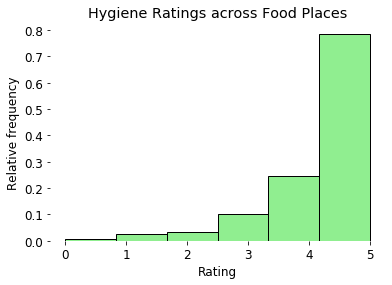

In [415]:
kwargs = {"edgecolor": "black", "facecolor": "lightgreen", "bins": 6, "density" : True}
showHistogram(df, "RatingValue", title = "Hygiene Ratings across Food Places", xlabel = "Rating",\
              ylabel= "Relative frequency", **kwargs)

##### C. Plotting boxplots
Next, we proceed to compare distributions of continuous variables across different categories.  
The main motivation behind this step of our descriptive analysis is to discover categories with abnormal distributions.  
Perhaps, we can perform some feature-engineering to further enhance our models' generalisability.  
Let's design a function to show us some appealing boxplots, as shown below:
```python
# Comparing distributions across different categories
def showBoxplot(df, columnName, byColumnName):
    # Convert to float especially for non-float series
    try:
        df[columnName] = pd.to_numeric(df[columnName], errors = "coerce")
    except TypeError as error:
        return print(error.args)
    # Create plot
    bp = df.boxplot(column = "RatingValue", by = "BusinessType", vert = False, return_type = "dict", \
                    patch_artist = True, figsize = (20, 15), sym = "k.")
    # Set title
    title = f"Comparing {columnName.lower()} distributions across {byColumnName.lower()}\n"
    # Aesthetics
    [[item.set_color('black') for item in bp[key]['boxes']] for key in bp.keys()] # Set line colour for boxes
    [[item.set_facecolor('lightgreen') for item in bp[key]['boxes']] for key in bp.keys()] # Set fill colour for boxes
    [[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()] # Line colour for whiskers
    [[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()] # Line colour for medians
    plt.suptitle("")
    plt.title(title, fontsize = 30) # Set title
    plt.xlabel(None)
    plt.ylabel(None)
    p = plt.gca() # Get axes
    plt.grid(False) # Remove gridlines
    plt.tick_params(axis='y', labelsize = 20) # Set tick sizes for y
    plt.tick_params(axis='x', labelsize = 20) # Set tick sizes for x
    p.set_xlabel(None) # Remove x labels
    p.set_ylabel(None) # Remove y labels
    # Show plot
    plt.show()
    ```

Upon running ```showBoxplot()```, we get these:

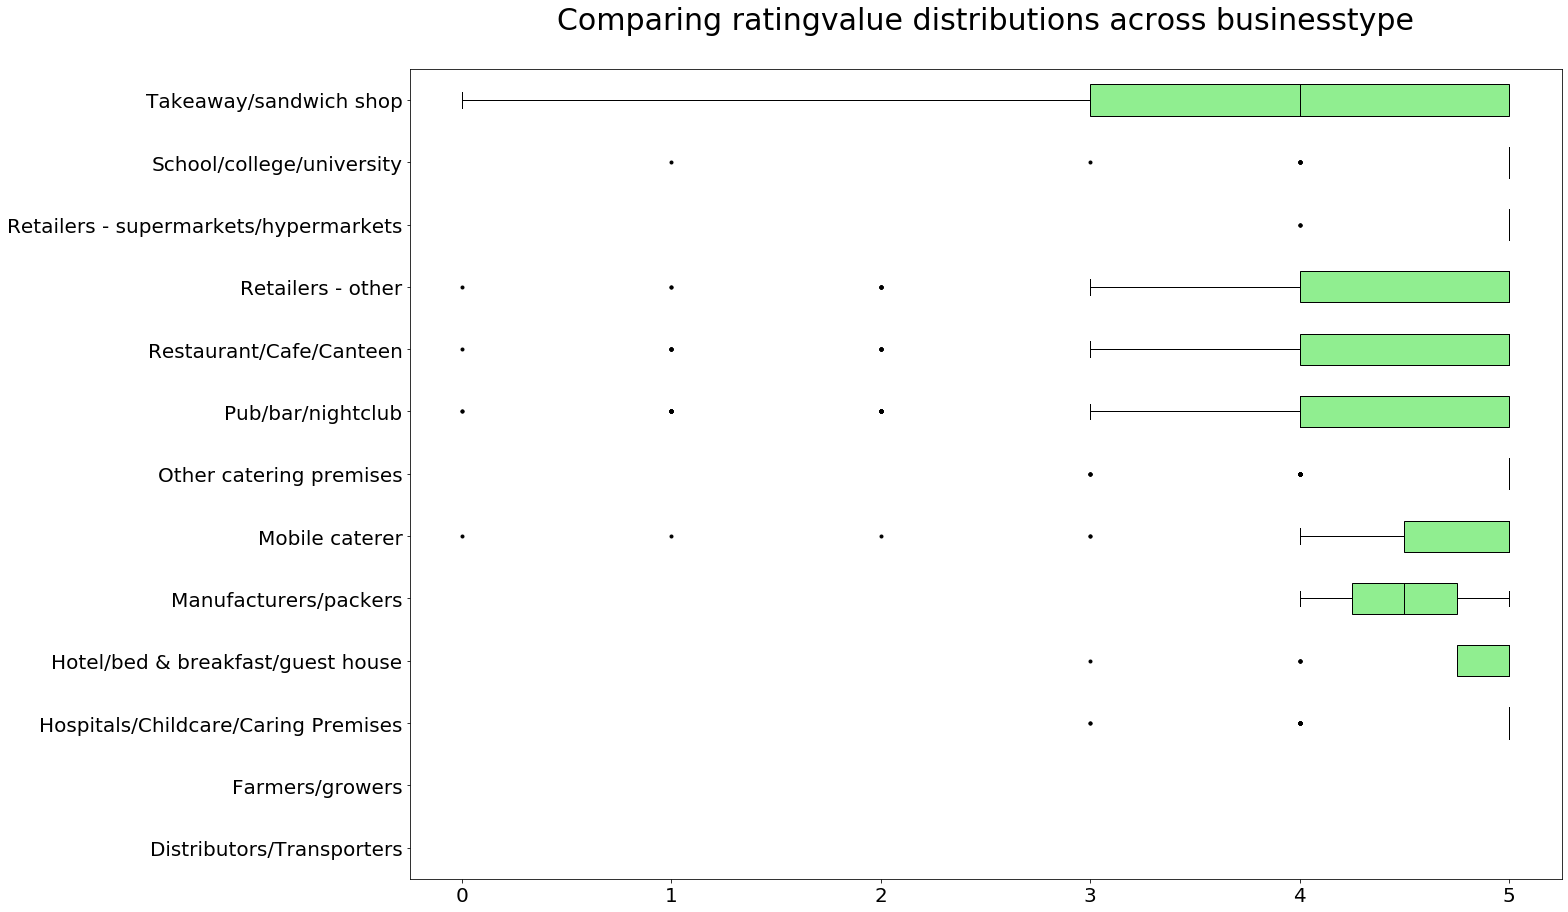

In [416]:
showBoxplot(df, "RatingValue", "BusinessType")

# Codes

In [417]:
# Load packages
import pandas as pd
import numpy as np

In [418]:
# General approach to inspect data
'''
1. Import data
2. Convert to dataframe if needed
3. Examine shape of dataframe
4. Check if first few or last few rows of dataframe do not contain headers
5. Use sample to examine random rows of dataframe
6. Check dataframe structure with dtypes
7. Run describe() and look for unexpected values
'''

'\n1. Import data\n2. Convert to dataframe if needed\n3. Examine shape of dataframe\n4. Check if first few or last few rows of dataframe do not contain headers\n5. Use sample to examine random rows of dataframe\n6. Check dataframe structure with dtypes\n7. Run describe() and look for unexpected values\n'

In [419]:
# Create user-defined function to run entire inspection pipeline
def inspectData(df):
    
    # Type
    print(f"Type of df: {type(df)}")
    # Shape
    try:
        print(f"\nNumber of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")
    except IndexError as error:
        return print(error.args)
    except AttributeError as error2:
        return print(error2.args)
    # Columns
    print(f"\nColumns:\n{' '.join([x for x in df.columns])}")
    # Head, tail
    print(f"\nHead:\n{df.head()}")
    print(f"Tail:\n{df.tail()}")
    # Sample
    print(f"\nSample:\n{df.sample(10)}")
    # Structure
    print(f"\nDtypes:\n{df.dtypes}")
    # Describe
    print(f"\nDescribing df...:\n{df.describe()}")
    # Output
    return print("\nInspection completed successfully!")

# Describing discrete data
def showFrequency(df, columnName, sort = True):
    
    # Perform group-by aggregation by selected factor
    dfGroup = df.groupby([columnName])[columnName].count()
    # Convert to dataframe for easy viewing
    dfOut = pd.DataFrame(list(zip(dfGroup.index, dfGroup.values)), columns = [columnName, "Frequency"])
    # Sort in descending order if sort is true to determine most popular category
    if sort:
        dfOut.sort_values(by = "Frequency", ascending = False, inplace = True)
    dfOut.reset_index(drop = True, inplace = True)
    
    return dfOut

# Describing continuous variables
def showSummary(df, columnName, lowerQuantile = 0.25, upperQuantile = 0.75):
    
    # Calculate interquartile range i.e. spread of middle 50% of data
    def calculateIQR(x, lowerQuantile, upperQuantile):
        iqr = x.quantile(upperQuantile) - x.quantile(lowerQuantile)
        return iqr
    
    # Convert to float especially for non-float series
    try:
        df[columnName] = pd.to_numeric(df[columnName], errors = "coerce")
    except TypeError as error:
        return print(error.args)
    
    # Create dataframe
    dfOut = pd.DataFrame([df[columnName].median(), calculateIQR(df[columnName], lowerQuantile, upperQuantile)],\
                         index = ["Median", "IQR"],\
                         columns = [columnName])
    
    return dfOut

# Plotting single continuous variables
def showHistogram(df, columnName, title, xlabel, ylabel, **kwargs):
    
    plt.rcParams.update({"font.size": 12})
    
    # Convert to float especially for non-float series
    try:
        df[columnName] = pd.to_numeric(df[columnName], errors = "coerce")
    except TypeError as error:
        return print(error.args)
    
    # Create plot
    df[columnName].plot.hist(**kwargs)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.box(False)
    plt.show()
    
# Comparing distributions across different categories
def showBoxplot(df, columnName, byColumnName):
    # Convert to float especially for non-float series
    try:
        df[columnName] = pd.to_numeric(df[columnName], errors = "coerce")
    except TypeError as error:
        return print(error.args)
    # Create plot
    bp = df.boxplot(column = "RatingValue", by = "BusinessType", vert = False, return_type = "dict", \
                    patch_artist = True, figsize = (20, 15), sym = "k.")
    # Set title
    title = f"Comparing {columnName.lower()} distributions across {byColumnName.lower()}\n"
    # Aesthetics
    [[item.set_color('black') for item in bp[key]['boxes']] for key in bp.keys()] # Set line colour for boxes
    [[item.set_facecolor('lightgreen') for item in bp[key]['boxes']] for key in bp.keys()] # Set fill colour for boxes
    [[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()] # Line colour for whiskers
    [[item.set_color('black') for item in bp[key]['medians']] for key in bp.keys()] # Line colour for medians
    plt.suptitle("")
    plt.title(title, fontsize = 30) # Set title
    plt.xlabel(None)
    plt.ylabel(None)
    p = plt.gca() # Get axes
    plt.grid(False) # Remove gridlines
    plt.tick_params(axis='y', labelsize = 20) # Set tick sizes for y
    plt.tick_params(axis='x', labelsize = 20) # Set tick sizes for x
    p.set_xlabel(None) # Remove x labels
    p.set_ylabel(None) # Remove y labels
    # Show plot
    plt.show()

In [420]:
# Load dataset
df = pd.read_csv('calderdale-food-premises-and-hygiene-ratings-2.csv')
# Inspect data
inspectData(df)

Type of df: <class 'pandas.core.frame.DataFrame'>

Number of rows: 2069
Number of columns: 11

Columns:
BusinessName AddressLine1 AddressLine2 AddressLine3 AddressLine4 PostCode BusinessType RatingValue RatingDate Latitude Longitude

Head:
              BusinessName          AddressLine1    AddressLine2  \
0         1885 The Pub Ltd                   NaN  Stainland Road   
1      1885 The Restaurant                   NaN  Stainland Road   
2         1904@Dean Clough                   NaN   36 Lee Bridge   
3  22 The Bar & Smokehouse  10-12 Victoria Place   Bradford Road   
4            22 The Square             22 Square   Bradford Road   

   AddressLine3        AddressLine4 PostCode             BusinessType  \
0           NaN             Halifax  HX4 9HN        Pub/bar/nightclub   
1           NaN  Stainland  Halifax  HX4 9HF  Restaurant/Cafe/Canteen   
2           NaN             Halifax  HX3 5AT        Pub/bar/nightclub   
3           NaN          Northowram  HX3 7HY        Pub/bar

In [421]:
showFrequency(df, "BusinessType")

,BusinessType,Frequency
0,Retailers - other,450
1,Restaurant/Cafe/Canteen,384
2,Pub/bar/nightclub,351
3,Takeaway/sandwich shop,264
4,Hospitals/Childcare/Caring Premises,201
5,Other catering premises,175
6,School/college/university,113
7,Mobile caterer,52
8,Retailers - supermarkets/hypermarkets,32
9,Hotel/bed & breakfast/guest house,28


In [422]:
showSummary(df, "RatingValue")

,RatingValue
Median,5.0
IQR,1.0


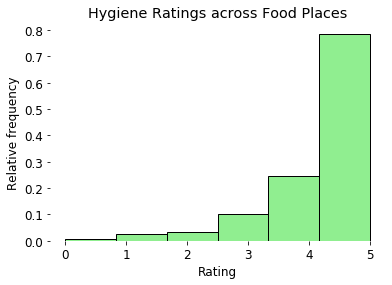

In [423]:
kwargs = {"edgecolor": "black", "facecolor": "lightgreen", "bins": 6, "density" : True}
showHistogram(df, "RatingValue", title = "Hygiene Ratings across Food Places", xlabel = "Rating",\
              ylabel= "Relative frequency", **kwargs)

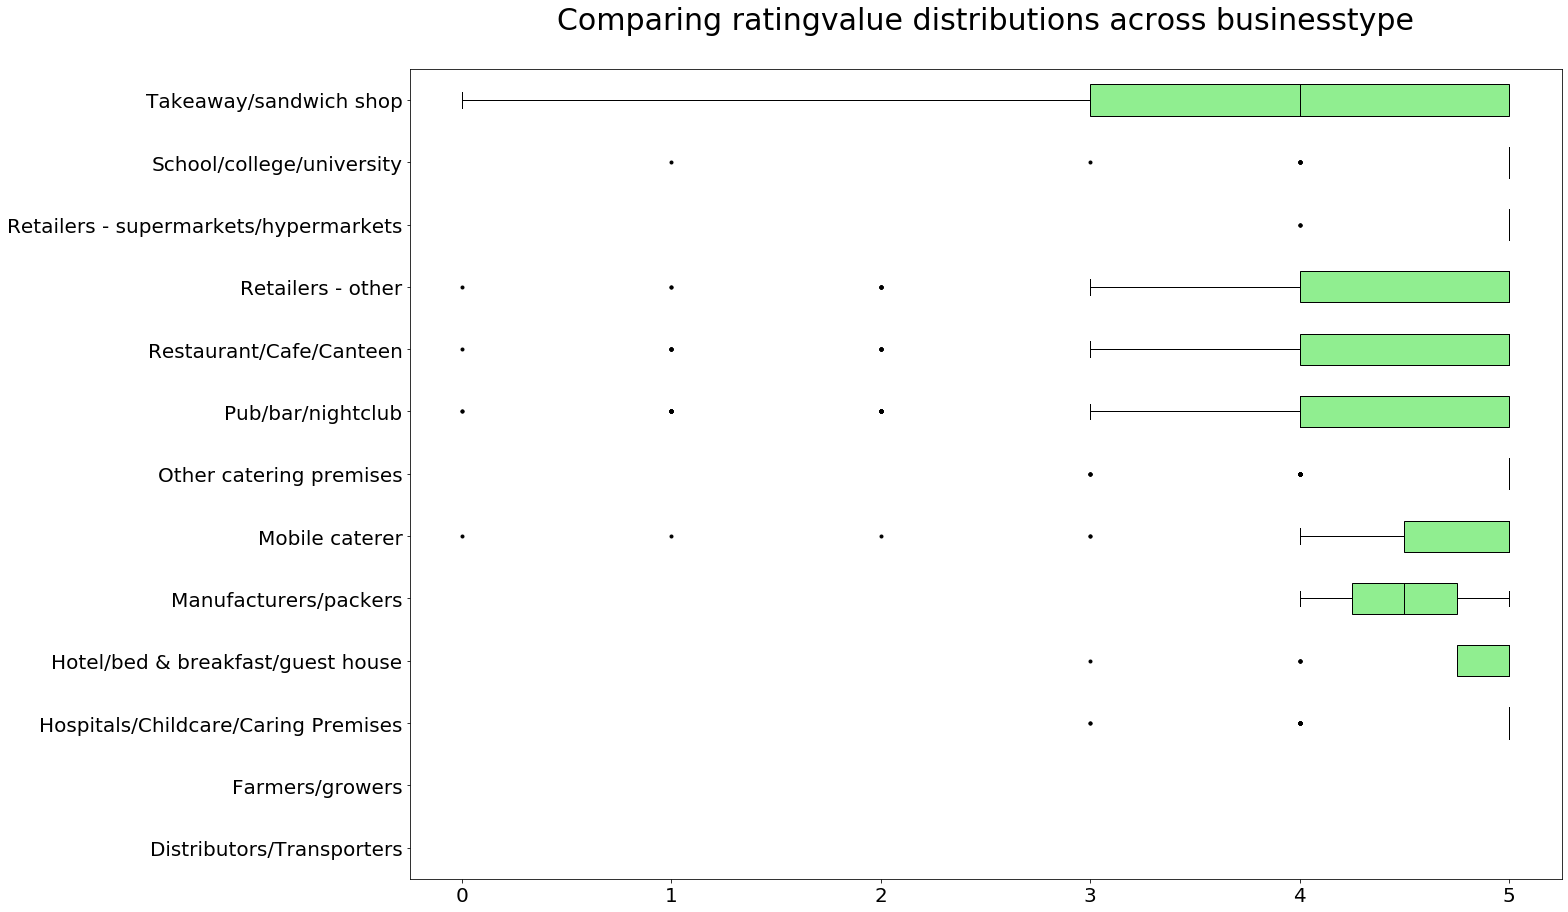

In [424]:
showBoxplot(df, "RatingValue", "BusinessType")